In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from scipy.interpolate import LinearNDInterpolator
import matplotlib.pyplot as plt

In [6]:
# Defining the ReLU network
class Net(nn.Module):
    def __init__(self, width):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, width)
        self.fc2 = nn.Linear(width, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Training the ReLU network
width = 100
net = Net(width)
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(1000):
    x_batch = torch.from_numpy(x_train).float()
    y_batch = torch.from_numpy(y_train).float().unsqueeze(1)

    optimizer.zero_grad()
    outputs = net(x_batch)
    loss = criterion(outputs, y_batch)
    loss.backward()
    optimizer.step()

In [7]:
# Defining the finite element mesh
n_grid = 32
x1_grid, x2_grid = np.meshgrid(np.linspace(0, 1, n_grid), np.linspace(0, 1, n_grid))
x_grid = np.stack((x1_grid.flat, x2_grid.flat), axis=1)
y_grid = np.apply_along_axis(lambda x: target_func(x[0], x[1]), 1, x_grid)

# Define the linear interpolation function
interpolator = LinearNDInterpolator(x_grid, y_grid)

In [8]:
# Generating Test Data
x_test = np.random.rand(1000, 2)
y_test = np.apply_along_axis(lambda x: target_func(x[0], x[1]), 1, x_test)

# Calculate the mean square error of the ReLU network
x_test_torch = torch.from_numpy(x_test).float()
with torch.no_grad():
    y_test_pred = net(x_test_torch).numpy().squeeze()
mse_relu = np.mean((y_test_pred - y_test)**2)
print(f'Mean square error for ReLU network: {mse_relu:.4f}')

# Calculate the mean square error of the finite element method
y_test_fe = interpolator(x_test)
mse_fe = np.mean((y_test_fe - y_test)**2)
print(f'Mean square error of finite element method: {mse_fe:.4f}')

Mean square error for ReLU network: 0.0006
Mean square error of finite element method: 0.0000


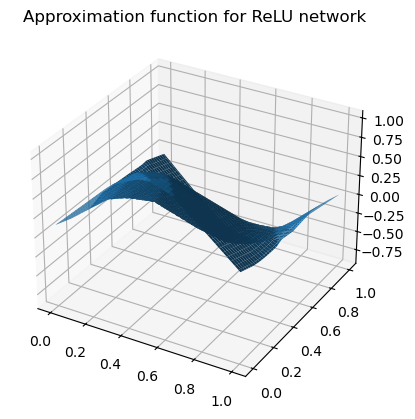

In [21]:
# Visualize the approximation function of the ReLU network
n_plot = 100
x1_plot, x2_plot = np.meshgrid(np.linspace(0, 1, n_plot), np.linspace(0, 1, n_plot))
x_plot = np.stack((x1_plot.flat, x2_plot.flat), axis=1)
x_plot_torch = torch.from_numpy(x_plot).float()
with torch.no_grad():
    y_plot_relu = net(x_plot_torch).numpy().reshape(n_plot, n_plot)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x1_plot, x2_plot, y_plot_relu)
ax.set_title('Approximation function for ReLU network')
plt.savefig('figure1.png', format='png')
plt.show()

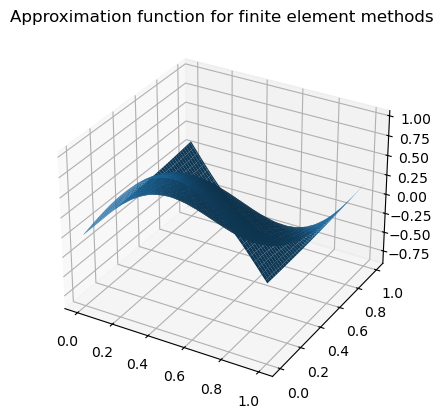

In [22]:
# Visualize the approximation function for the finite element method
y_plot_fe = interpolator(x_plot).reshape(n_plot, n_plot)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x1_plot, x2_plot, y_plot_fe)
ax.set_title('Approximation function for finite element methods')
plt.savefig('figure2.png', format='png')
plt.show()